In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
from scipy import stats 
import os

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(f'\'{os.path.join(dirname, filename)}\'')

In [2]:
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

In [3]:
df['sales']=df['Total Price']+df['Add-on Total']
df.head()

,Customer ID,Age,Gender,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,sales
0,1000,53,Male,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024/3/20,Standard,"Accessory,Accessory,Accessory",40.21,5578.54
1,1000,53,Male,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024/4/20,Overnight,Impulse Item,26.09,767.18
2,1002,41,Male,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023/10/17,Express,NaN,0.00,1855.84
3,1002,41,Male,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024/8/9,Overnight,"Impulse Item,Impulse Item",60.16,3224.92
4,1003,75,Male,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024/5/21,Express,Accessory,35.56,77.06


In [7]:
df.dtypes

Customer ID            int64
Age                    int64
Gender                object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
sales                float64
dtype: object

In [9]:
import pandas as pd

df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

daily_gmv = df.groupby(df['Purchase Date'].dt.date)['sales'].sum().reset_index()

print(daily_gmv)

    Purchase Date      sales
0      2023-09-24   61986.43
1      2023-09-25   64352.91
2      2023-09-26   62194.21
3      2023-09-27   83521.70
4      2023-09-28   90850.44
..            ...        ...
361    2024-09-19  218848.88
362    2024-09-20  194548.27
363    2024-09-21  213865.53
364    2024-09-22  209749.93
365    2024-09-23  231439.28

[366 rows x 2 columns]


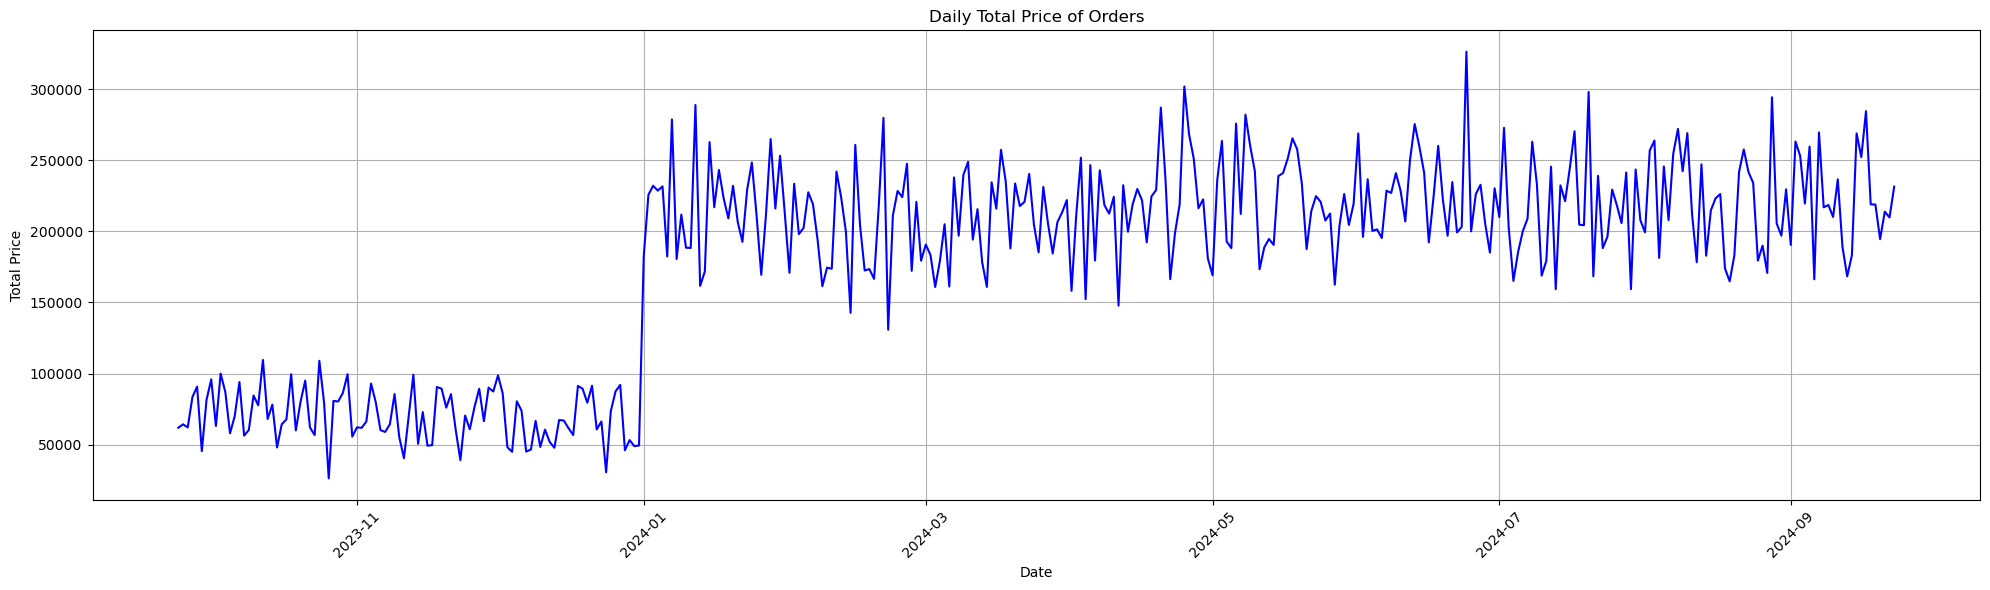

In [11]:
plt.figure(figsize=(20, 6))
plt.plot(daily_gmv['Purchase Date'], daily_gmv['sales'], linestyle='-', color='b')
plt.title('Daily Total Price of Orders')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [13]:
monthly_gmv = df.groupby(df['Purchase Date'].dt.to_period('M'))['sales'].sum().reset_index()

print(monthly_gmv)

   Purchase Date       sales
0        2023-09   489974.41
1        2023-10  2356303.47
2        2023-11  2103322.95
3        2023-12  2014209.48
4        2024-01  6756367.63
5        2024-02  5853844.98
6        2024-03  6449322.10
7        2024-04  6542227.21
8        2024-05  6841061.44
9        2024-06  6795323.18
10       2024-07  6667146.72
11       2024-08  6841251.75
12       2024-09  5137210.01


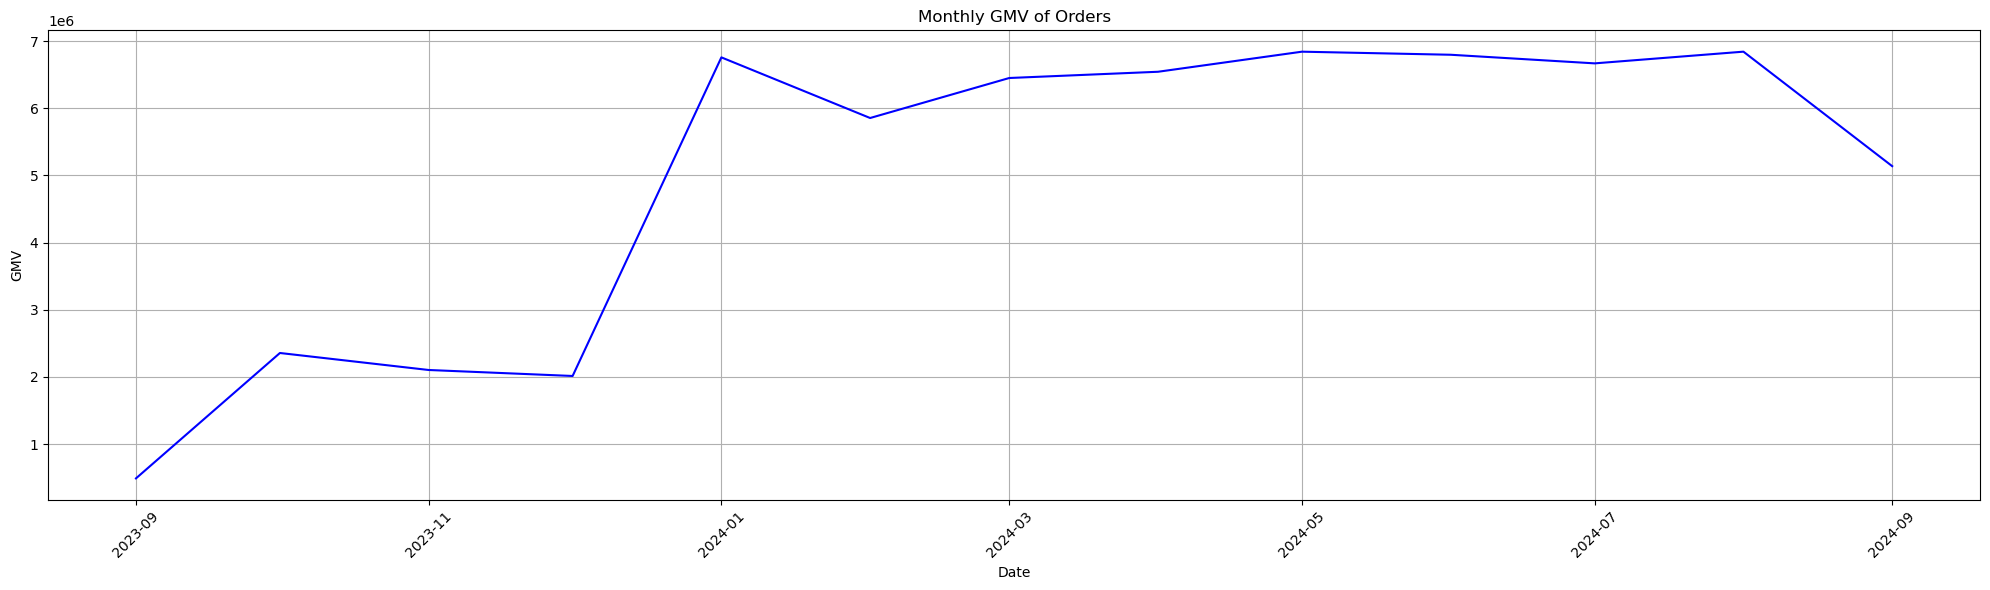

In [15]:
monthly_gmv['Purchase Date'] = monthly_gmv['Purchase Date'].dt.to_timestamp()
plt.figure(figsize=(20, 6))
plt.plot(monthly_gmv['Purchase Date'], monthly_gmv['sales'], linestyle='-', color='b')
plt.title('Monthly GMV of Orders')
plt.xlabel('Date')
plt.ylabel('GMV')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [17]:
completed_orders = df[df['Order Status'] == 'Completed']
completed_orders.head()

,Customer ID,Age,Gender,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,sales
1,1000,53,Male,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,767.18
2,1002,41,Male,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,1855.84
3,1002,41,Male,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,3224.92
4,1003,75,Male,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,77.06
5,1004,41,Female,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78,148.78


In [19]:
completed_orders['Purchase Date'] = pd.to_datetime(completed_orders['Purchase Date'])
daily_gmv1 = completed_orders.groupby(completed_orders['Purchase Date'].dt.date)['sales'].sum().reset_index()
print(daily_gmv1)

    Purchase Date      sales
0      2023-09-24   37363.11
1      2023-09-25   32617.04
2      2023-09-26   31715.76
3      2023-09-27   42520.55
4      2023-09-28   55757.33
..            ...        ...
361    2024-09-19  166201.41
362    2024-09-20  159104.56
363    2024-09-21  147636.00
364    2024-09-22  108824.96
365    2024-09-23  151086.74

[366 rows x 2 columns]


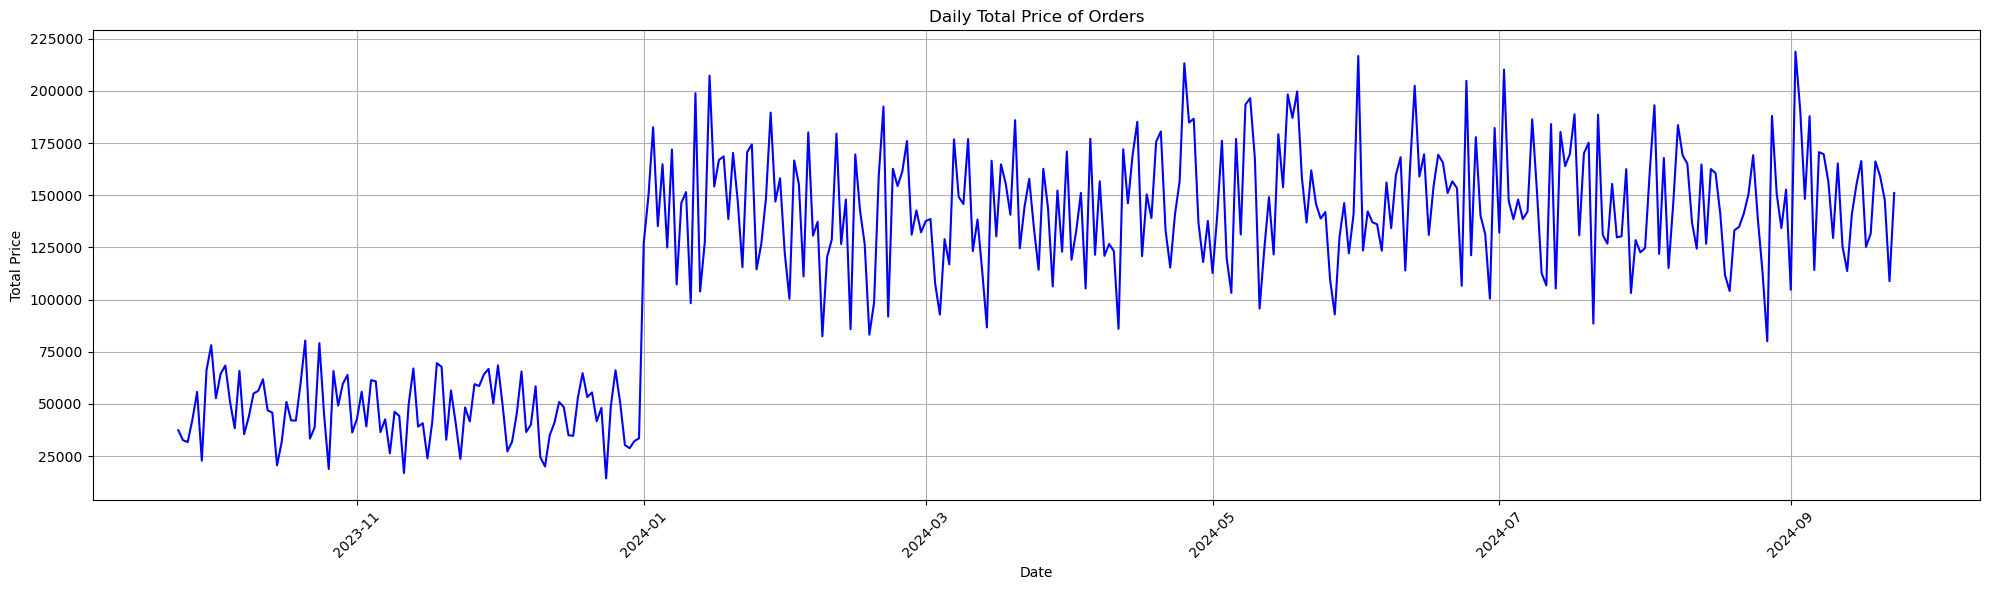

In [21]:
plt.figure(figsize=(20, 6))
plt.plot(daily_gmv1['Purchase Date'], daily_gmv1['sales'], linestyle='-', color='b')
plt.title('Daily Total Price of Orders')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
monthly_gmv1 = completed_orders.groupby(completed_orders['Purchase Date'].dt.to_period('M'))['sales'].sum().reset_index()

print(monthly_gmv1)

   Purchase Date       sales
0        2023-09   288973.36
1        2023-10  1581479.07
2        2023-11  1414569.83
3        2023-12  1332773.10
4        2024-01  4609532.76
5        2024-02  3977503.88
6        2024-03  4310840.58
7        2024-04  4382617.75
8        2024-05  4552289.38
9        2024-06  4550643.31
10       2024-07  4549758.03
11       2024-08  4466294.21
12       2024-09  3447935.55


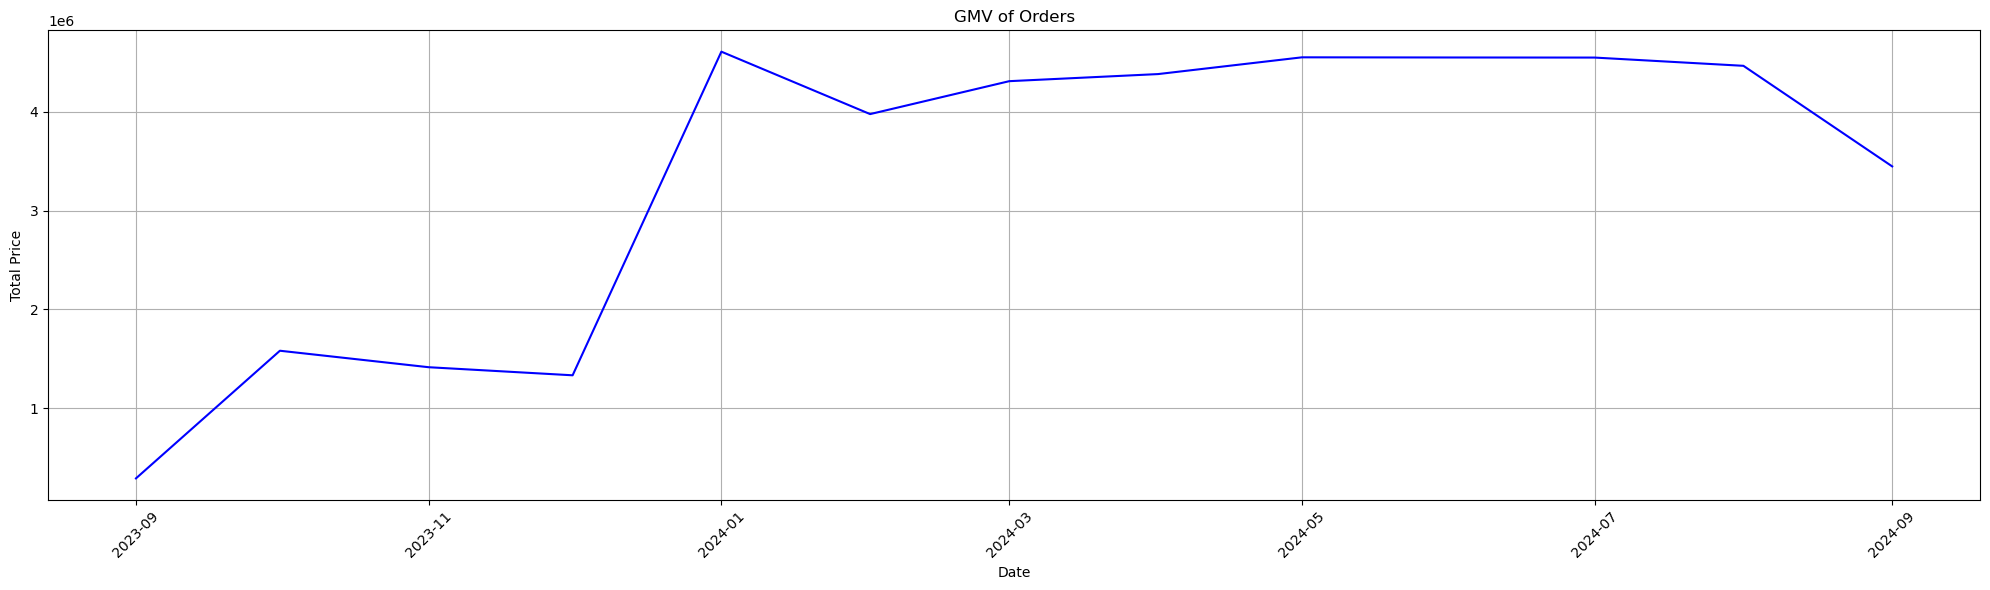

In [25]:
monthly_gmv1['Purchase Date'] = monthly_gmv1['Purchase Date'].dt.to_timestamp()
plt.figure(figsize=(20, 6))
plt.plot(monthly_gmv1['Purchase Date'], monthly_gmv1['sales'], linestyle='-', color='b')
plt.title('GMV of Orders')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
daily_sale = completed_orders.groupby(completed_orders['Purchase Date'].dt.date)['Quantity'].sum().reset_index()
print(daily_sale)

    Purchase Date  Quantity
0      2023-09-24       105
1      2023-09-25        81
2      2023-09-26        79
3      2023-09-27       106
4      2023-09-28        87
..            ...       ...
361    2024-09-19       277
362    2024-09-20       274
363    2024-09-21       240
364    2024-09-22       226
365    2024-09-23       216

[366 rows x 2 columns]


In [29]:
T = 3
date_point = len(monthly_gmv1['sales']) - 1 
monthly_sales = monthly_gmv1['sales']
window_data = monthly_sales[date_point - T : date_point]
mean = np.mean(window_data)
std_dev = np.std(window_data, ddof=1) 
z_score = (monthly_sales[date_point] - mean) / std_dev
z_score

-22.17538557713991

In [31]:
monthly_gmv1['sales'].iloc[-12]

1581479.07

In [33]:
# 同比：
mom_gmv = (monthly_gmv1['sales'].iloc[-1] - monthly_gmv1['sales'].iloc[-2])/monthly_gmv1['sales'].iloc[-2]
mom_gmv

-0.2280097575569255

In [35]:
# 同比：
yoy_gmv = (monthly_gmv1['sales'].iloc[-1] - monthly_gmv1['sales'].iloc[-12])/monthly_gmv1['sales'].iloc[-12]
yoy_gmv

1.180196763527196

# 维度分析
## 总运营

In [37]:
monthly_quantity = df.groupby(df['Purchase Date'].dt.to_period('M'))['Quantity'].sum().reset_index()

print(monthly_quantity)

   Purchase Date  Quantity
0        2023-09      1023
1        2023-10      5027
2        2023-11      4310
3        2023-12      4352
4        2024-01     11185
5        2024-02      9882
6        2024-03     10697
7        2024-04     10748
8        2024-05     11230
9        2024-06     10903
10       2024-07     10948
11       2024-08     11102
12       2024-09      8304


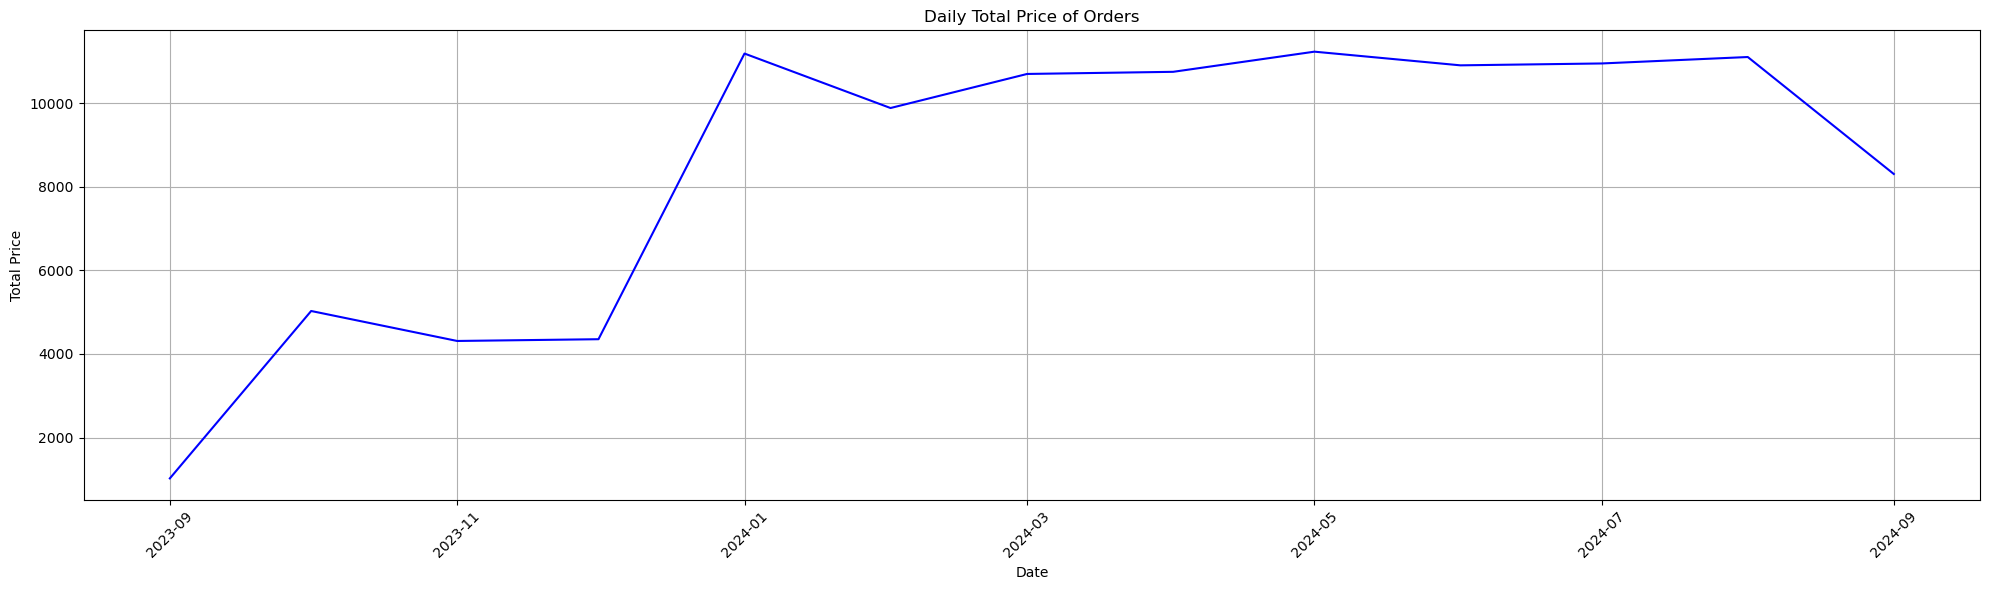

In [39]:
monthly_quantity['Purchase Date'] = monthly_quantity['Purchase Date'].dt.to_timestamp()
plt.figure(figsize=(20, 6))
plt.plot(monthly_quantity['Purchase Date'], monthly_quantity['Quantity'], linestyle='-', color='b')
plt.title('Daily Total Price of Orders')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [47]:
completed_orders['Purchase Date'] = pd.to_datetime(completed_orders['Purchase Date'])
completed_orders['Year-Month'] = completed_orders['Purchase Date'].dt.to_period('M')
monthly_data = completed_orders.groupby('Year-Month').agg(
    monthly_orders=('Customer ID', 'nunique'), 
    total_sales=('sales', 'sum')  
)

monthly_data['average_order_amount'] = monthly_data['total_sales'] / monthly_data['monthly_orders']
print(monthly_data)


            monthly_orders  total_sales  average_order_amount
Year-Month                                                   
2023-09                121    288973.36           2388.209587
2023-10                592   1581479.07           2671.417348
2023-11                521   1414569.83           2715.105240
2023-12                510   1332773.10           2613.280588
2024-01               1345   4609532.76           3427.161903
2024-02               1179   3977503.88           3373.625004
2024-03               1281   4310840.58           3365.215129
2024-04               1231   4382617.75           3560.209383
2024-05               1317   4552289.38           3456.559894
2024-06               1292   4550643.31           3522.169745
2024-07               1314   4549758.03           3462.525137
2024-08               1271   4466294.21           3514.000165
2024-09                962   3447935.55           3584.132588


## 品类

In [50]:
monthly_gmv_e = completed_orders.groupby(completed_orders['Purchase Date'].dt.to_period('M'))['Total Price'].sum().reset_index()

print(monthly_gmv_e)

   Purchase Date  Total Price
0        2023-09    283635.75
1        2023-10   1555325.86
2        2023-11   1390116.50
3        2023-12   1310022.87
4        2024-01   4516277.81
5        2024-02   3897250.16
6        2024-03   4226126.65
7        2024-04   4300323.69
8        2024-05   4462915.20
9        2024-06   4465994.71
10       2024-07   4460946.48
11       2024-08   4378433.10
12       2024-09   3382246.79


In [52]:
monthly_gmv_add = completed_orders.groupby(completed_orders['Purchase Date'].dt.to_period('M'))['Add-on Total'].sum().reset_index()

print(monthly_gmv_add)

   Purchase Date  Add-on Total
0        2023-09       5337.61
1        2023-10      26153.21
2        2023-11      24453.33
3        2023-12      22750.23
4        2024-01      93254.95
5        2024-02      80253.72
6        2024-03      84713.93
7        2024-04      82294.06
8        2024-05      89374.18
9        2024-06      84648.60
10       2024-07      88811.55
11       2024-08      87861.11
12       2024-09      65688.76


In [54]:
mom_gmv_e=(monthly_gmv_e['Total Price'].iloc[-1]-monthly_gmv_e['Total Price'].iloc[-2])/monthly_gmv_e['Total Price'].iloc[-2]
mom_gmv_add=(monthly_gmv_add['Add-on Total'].iloc[-1]-monthly_gmv_add['Add-on Total'].iloc[-2])/monthly_gmv_add['Add-on Total'].iloc[-2]
mom_gmv_e, mom_gmv_add

(-0.2275211901718904, -0.2523568163434312)

In [56]:
monthly_product_data = completed_orders.groupby(['Year-Month', 'Product Type']).agg(
    monthly_orders=('Customer ID', 'nunique'),  # 计算每月唯一的订单数
    total_sales=('sales', 'sum')  # 计算每月总销售额
)

monthly_product_data['average_order_amount'] = monthly_product_data['total_sales'] / monthly_product_data['monthly_orders']

print(monthly_product_data)


                         monthly_orders  total_sales  average_order_amount
Year-Month Product Type                                                   
2023-09    Laptop                    24     58564.28           2440.178333
           Smartphone                35     65348.34           1867.095429
           Smartwatch                23    107493.67           4673.637826
           Tablet                    42     57567.07           1370.644524
2023-10    Laptop                   118    319191.58           2705.013390
...                                 ...          ...                   ...
2024-09    Headphones               109    235191.94           2157.724220
           Laptop                   176    590325.57           3354.122557
           Smartphone               301   1257862.52           4178.945249
           Smartwatch               189    700425.55           3705.955291
           Tablet                   216    664129.97           3074.675787

[61 rows x 3 columns]


In [58]:
monthly_product_data['monthly_orders'].iloc[-10:]

Year-Month  Product Type
2024-08     Headphones      156
            Laptop          240
            Smartphone      371
            Smartwatch      276
            Tablet          269
2024-09     Headphones      109
            Laptop          176
            Smartphone      301
            Smartwatch      189
            Tablet          216
Name: monthly_orders, dtype: int64

In [60]:
# monthly_product_data['average_order_amount'].iloc[-10:-1]

In [62]:
import pandas as pd

cancelled_orders = df[df['Order Status'] == 'Cancelled']
cancelled_orders['Purchase Date'] = pd.to_datetime(cancelled_orders['Purchase Date'])
cancelled_orders['Year-Month'] = cancelled_orders['Purchase Date'].dt.to_period('M')

monthly_cancelled_orders = cancelled_orders.groupby('Year-Month').agg(
    cancelled_orders_count=('Customer ID', 'nunique'),  # 计算每月唯一的退货订单数
)

print(monthly_cancelled_orders)


            cancelled_orders_count
Year-Month                        
2023-09                         64
2023-10                        293
2023-11                        257
2023-12                        273
2024-01                        636
2024-02                        586
2024-03                        624
2024-04                        637
2024-05                        664
2024-06                        643
2024-07                        626
2024-08                        679
2024-09                        489


In [64]:
monthly_completed_orders = completed_orders.groupby('Year-Month').agg(
    completed_orders_orders_count=('Customer ID', 'nunique'),  # 计算每月唯一的退货订单数
)

print(monthly_completed_orders)

            completed_orders_orders_count
Year-Month                               
2023-09                               121
2023-10                               592
2023-11                               521
2023-12                               510
2024-01                              1345
2024-02                              1179
2024-03                              1281
2024-04                              1231
2024-05                              1317
2024-06                              1292
2024-07                              1314
2024-08                              1271
2024-09                               962


# 用户维度

In [67]:
monthly_customers = completed_orders.groupby('Year-Month').agg(
    customer_count=('Customer ID', 'nunique'),  # 计算每月唯一的退货订单数
)

print(monthly_customers)

            customer_count
Year-Month                
2023-09                121
2023-10                592
2023-11                521
2023-12                510
2024-01               1345
2024-02               1179
2024-03               1281
2024-04               1231
2024-05               1317
2024-06               1292
2024-07               1314
2024-08               1271
2024-09                962


In [69]:
monthly_aov = completed_orders.groupby('Year-Month').agg(
    total_sales=('sales', 'sum'),  
    unique_customers=('Customer ID', 'nunique') 
)

monthly_aov['average_order_value'] = monthly_aov['total_sales'] / monthly_aov['unique_customers']
print(monthly_aov)


            total_sales  unique_customers  average_order_value
Year-Month                                                    
2023-09       288973.36               121          2388.209587
2023-10      1581479.07               592          2671.417348
2023-11      1414569.83               521          2715.105240
2023-12      1332773.10               510          2613.280588
2024-01      4609532.76              1345          3427.161903
2024-02      3977503.88              1179          3373.625004
2024-03      4310840.58              1281          3365.215129
2024-04      4382617.75              1231          3560.209383
2024-05      4552289.38              1317          3456.559894
2024-06      4550643.31              1292          3522.169745
2024-07      4549758.03              1314          3462.525137
2024-08      4466294.21              1271          3514.000165
2024-09      3447935.55               962          3584.132588


### 划分新用户与老用户

In [72]:
first_purchase = completed_orders.groupby('Customer ID')['Purchase Date'].min()

first_purchase_month = first_purchase.dt.to_period('M')
new_users_per_month = first_purchase_month.value_counts().sort_index()
print(new_users_per_month)


Purchase Date
2023-09     121
2023-10     581
2023-11     482
2023-12     442
2024-01    1236
2024-02    1029
2024-03    1028
2024-04     907
2024-05     906
2024-06     798
2024-07     781
2024-08     698
2024-09     457
Freq: M, Name: count, dtype: int64


In [74]:
monthly_customers['new']=new_users_per_month
monthly_customers

,customer_count,new
Year-Month,,
2023-09,121,121
2023-10,592,581
2023-11,521,482
2023-12,510,442
2024-01,1345,1236
2024-02,1179,1029
2024-03,1281,1028
2024-04,1231,907
2024-05,1317,906


In [76]:
monthly_customers['old']=monthly_customers['customer_count']-monthly_customers['new']

In [78]:
monthly_customers

,customer_count,new,old
Year-Month,,,
2023-09,121,121,0
2023-10,592,581,11
2023-11,521,482,39
2023-12,510,442,68
2024-01,1345,1236,109
2024-02,1179,1029,150
2024-03,1281,1028,253
2024-04,1231,907,324
2024-05,1317,906,411


In [80]:
monthly_customers['Total Customer Growth Rate'] = monthly_customers['customer_count'].pct_change() * 100
monthly_customers['New Customer Growth Rate'] = monthly_customers['new'].pct_change() * 100
monthly_customers['Old Customer Growth Rate'] = monthly_customers['old'].pct_change() * 100
monthly_customers

,customer_count,new,old,Total Customer Growth Rate,New Customer Growth Rate,Old Customer Growth Rate
Year-Month,,,,,,
2023-09,121,121,0,NaN,NaN,NaN
2023-10,592,581,11,389.256198,380.165289,inf
2023-11,521,482,39,-11.993243,-17.039587,254.545455
2023-12,510,442,68,-2.111324,-8.298755,74.358974
2024-01,1345,1236,109,163.725490,179.638009,60.294118
2024-02,1179,1029,150,-12.342007,-16.747573,37.614679
2024-03,1281,1028,253,8.651399,-0.097182,68.666667
2024-04,1231,907,324,-3.903201,-11.770428,28.063241
2024-05,1317,906,411,6.986190,-0.110254,26.851852


<Axes: xlabel='Year-Month'>

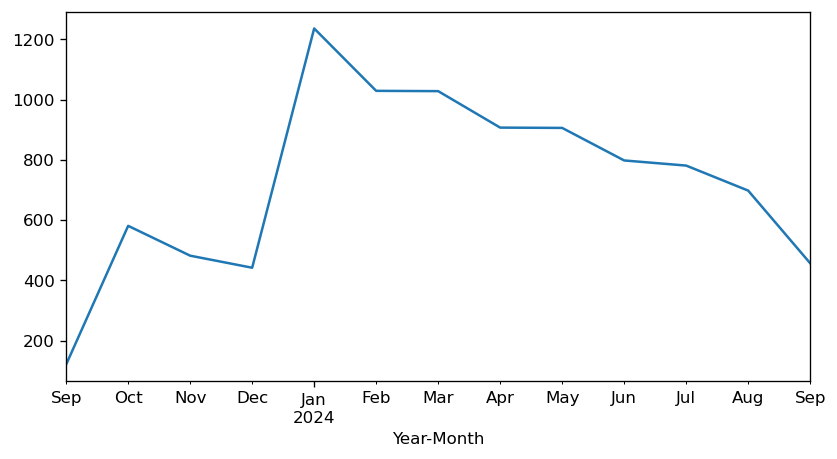

In [80]:
plt.figure(figsize=(8,4),dpi=120)
monthly_customers['new'].plot()

<Axes: xlabel='Purchase Date'>

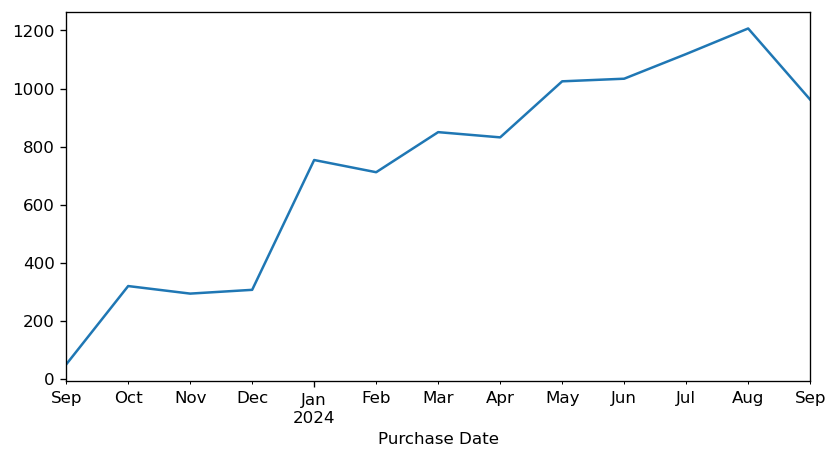

In [82]:
final_purchase = completed_orders.groupby('Customer ID')['Purchase Date'].max()
final_purchase_month = final_purchase.dt.to_period('M')
final_users_per_month = final_purchase_month.value_counts().sort_index()
plt.figure(figsize=(8,4),dpi=120)
final_users_per_month.plot()

In [82]:
from datetime import datetime, timedelta
completed_orders['Purchase Date'] = pd.to_datetime(completed_orders['Purchase Date'])
last_date = df['Purchase Date'].max()
thirty_days_ago = last_date - timedelta(days=30)
recent_orders = completed_orders[completed_orders['Purchase Date'] >= thirty_days_ago]

recent_orders

,Customer ID,Age,Gender,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,sales,Year-Month
17,1015,22,Male,Smartphone,SKU1001,5,Completed,Paypal,83.00,20.75,4,2024-09-02,Standard,"Accessory,Accessory,Accessory",80.00,163.00,2024-09
28,1025,77,Male,Smartphone,SKU1001,5,Completed,Cash,83.00,20.75,4,2024-08-28,Express,"Extended Warranty,Extended Warranty",77.78,160.78,2024-08
33,1031,20,Female,Smartphone,SKU1001,5,Completed,Debit Card,103.75,20.75,5,2024-09-03,Overnight,"Accessory,Accessory",17.79,121.54,2024-09
43,1038,56,Female,Smartphone,SKU1004,2,Completed,Debit Card,5538.33,791.19,7,2024-09-23,Overnight,"Extended Warranty,Accessory",26.01,5564.34,2024-09
44,1039,53,Female,Tablet,SKU1002,3,Completed,Credit Card,1729.21,247.03,7,2024-08-31,Standard,NaN,0.00,1729.21,2024-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,19969,67,Male,Headphones,HDP456,3,Completed,Bank Transfer,2528.26,361.18,7,2024-09-22,Standard,Extended Warranty,23.96,2552.22,2024-09
19971,19971,56,Male,Smartphone,SMP234,4,Completed,Credit Card,3419.04,1139.68,3,2024-09-02,Same Day,"Impulse Item, Extended Warranty, Impulse Item",172.43,3591.47,2024-09
19984,19984,62,Male,Laptop,LTP123,1,Completed,PayPal,674.32,674.32,1,2024-09-22,Expedited,"Extended Warranty, Accessory",135.71,810.03,2024-09
19988,19991,75,Male,Smartphone,SMP234,5,Completed,PayPal,9117.44,1139.68,8,2024-09-08,Same Day,NaN,0.00,9117.44,2024-09


In [84]:
# 用户分层
# 构建RFM模型
rfm = recent_orders.pivot_table(index='Customer ID',
                    values=['Purchase Date','SKU','Total Price'],
                    aggfunc={
                        'Purchase Date':'max',  # 最后一次购买
                        'SKU':'count',  # 总订单数
                        'Total Price':'sum'   # 消费总金额
,                    })
rfm.head()

,Purchase Date,SKU,Total Price
Customer ID,,,
1015,2024-09-02,1,83.00
1025,2024-08-28,1,83.00
1031,2024-09-03,1,103.75
1038,2024-09-23,1,5538.33
1039,2024-08-31,1,1729.21


In [86]:
rfm['R'] = -(rfm['Purchase Date'] - rfm['Purchase Date'].max())/np.timedelta64(1,'D')  #取相差的天数  小数点为0 精确到天
rfm.rename(columns={'SKU':'F','Total Price':'M'},inplace=True)
rfm.head()

,Purchase Date,F,M,R
Customer ID,,,,
1015,2024-09-02,1,83.00,21.0
1025,2024-08-28,1,83.00,26.0
1031,2024-09-03,1,103.75,20.0
1038,2024-09-23,1,5538.33,0.0
1039,2024-08-31,1,1729.21,23.0


In [88]:
def rfm_func(x): 
    level = x.apply(lambda x:'1' if x>=1 else '0')
    label = level['R'] + level['F'] + level['M']  # 举例：1 0 0    1 1 1
    d = {
        '111':'Significant value customer', #重要价值客户
        '011':'Important retention customer', #重要保持客户
        '101':'Key development customer', # 重要发展客户
        '001':'Key retention customer', #重要挽留客户
        '110':'General value customer', #一般价值客户
        '010':'General holding customer', #一般保持客户
        '100':'General development account', #一般发展客户
        '000':'General retention' #一般挽留客户
    }
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1) # axis=1 向右逐步取列
rfm.head()

,Purchase Date,F,M,R,label
Customer ID,,,,,
1015,2024-09-02,1,83.00,21.0,General development account
1025,2024-08-28,1,83.00,26.0,General development account
1031,2024-09-03,1,103.75,20.0,General development account
1038,2024-09-23,1,5538.33,0.0,Key retention customer
1039,2024-08-31,1,1729.21,23.0,General development account


In [90]:
rfm

,Purchase Date,F,M,R,label
Customer ID,,,,,
1015,2024-09-02,1,83.00,21.0,General development account
1025,2024-08-28,1,83.00,26.0,General development account
1031,2024-09-03,1,103.75,20.0,General development account
1038,2024-09-23,1,5538.33,0.0,Key retention customer
1039,2024-08-31,1,1729.21,23.0,General development account
...,...,...,...,...,...
19969,2024-09-22,1,2528.26,1.0,General retention
19971,2024-09-02,1,3419.04,21.0,General development account
19984,2024-09-22,1,674.32,1.0,General retention


In [93]:
date_one_month_before = last_date - pd.DateOffset(months=1)

sixty_days_ago = date_one_month_before - timedelta(days=30)
recent_orders_1 = completed_orders[ (completed_orders['Purchase Date'] >= sixty_days_ago) & (completed_orders['Purchase Date'] < date_one_month_before)]

recent_orders_1

,Customer ID,Age,Gender,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,sales,Year-Month
3,1002,41,Male,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,3224.92,2024-08
41,1038,56,Female,Smartwatch,SKU1003,3,Completed,Cash,5068.98,844.83,6,2024-07-29,Standard,NaN,0.00,5068.98,2024-07
42,1038,56,Female,Smartphone,SKU1001,5,Completed,Debit Card,145.25,20.75,7,2024-08-17,Express,"Accessory,Extended Warranty",47.94,193.19,2024-08
86,1080,55,Female,Tablet,SKU1002,3,Completed,Credit Card,247.03,247.03,1,2024-08-18,Express,Impulse Item,16.65,263.68,2024-08
87,1083,24,Male,Smartwatch,SKU1003,3,Completed,Credit Card,3379.32,844.83,4,2024-07-29,Overnight,NaN,0.00,3379.32,2024-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19911,19910,71,Female,Smartphone,SMP234,3,Completed,PayPal,9117.44,1139.68,8,2024-08-22,Expedited,"Accessory, Accessory",69.30,9186.74,2024-08
19941,19941,71,Female,Smartwatch,SWT567,5,Completed,Credit Card,4135.50,459.50,9,2024-08-12,Same Day,NaN,0.00,4135.50,2024-08
19943,19942,57,Male,Smartwatch,SWT567,2,Completed,PayPal,4595.00,459.50,10,2024-08-17,Standard,Impulse Item,73.91,4668.91,2024-08
19952,19952,70,Female,Smartwatch,SWT567,3,Completed,Credit Card,2297.50,459.50,5,2024-07-27,Standard,"Accessory, Accessory",60.78,2358.28,2024-07


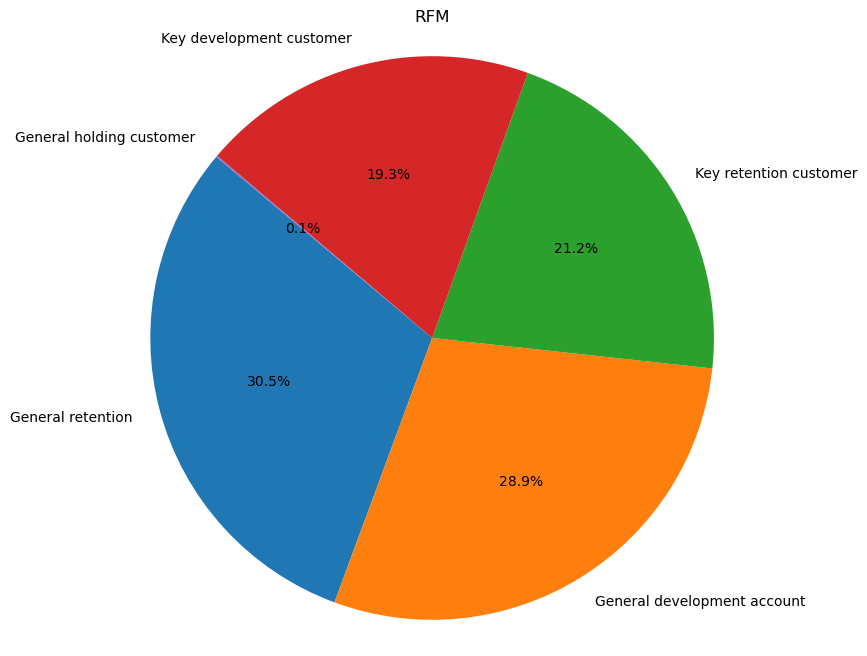

In [96]:
label_counts = rfm['label'].value_counts() 
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('RFM')
plt.axis('equal')
plt.show()

In [98]:
rfm1 = recent_orders_1.pivot_table(index='Customer ID',
                    values=['Purchase Date','SKU','Total Price'],
                    aggfunc={
                        'Purchase Date':'max',  # 最后一次购买
                        'SKU':'count',  # 总订单数
                        'Total Price':'sum'   # 消费总金额
,                    })
rfm1.head()

,Purchase Date,SKU,Total Price
Customer ID,,,
1002,2024-08-09,1,3164.76
1038,2024-08-17,2,5214.23
1080,2024-08-18,1,247.03
1083,2024-07-29,1,3379.32
1089,2024-08-09,1,3955.95


In [100]:
rfm1['R'] = -(rfm1['Purchase Date'] - rfm1['Purchase Date'].max())/np.timedelta64(1,'D')  #取相差的天数  小数点为0 精确到天
rfm1.rename(columns={'SKU':'F','Total Price':'M'},inplace=True)
rfm1.head()

,Purchase Date,F,M,R
Customer ID,,,,
1002,2024-08-09,1,3164.76,13.0
1038,2024-08-17,2,5214.23,5.0
1080,2024-08-18,1,247.03,4.0
1083,2024-07-29,1,3379.32,24.0
1089,2024-08-09,1,3955.95,13.0


In [102]:
rfm1['label'] = rfm1[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1) # axis=1 向右逐步取列
rfm1.head()

,Purchase Date,F,M,R,label
Customer ID,,,,,
1002,2024-08-09,1,3164.76,13.0,General retention
1038,2024-08-17,2,5214.23,5.0,Key retention customer
1080,2024-08-18,1,247.03,4.0,General retention
1083,2024-07-29,1,3379.32,24.0,Key development customer
1089,2024-08-09,1,3955.95,13.0,Key retention customer


In [104]:
label_counts_rfm = rfm.groupby('label').size().reset_index(name='Count_rmf')
label_counts_rfm

,label,Count_rmf
0,General development account,368
1,General holding customer,1
2,General retention,388
3,Key development customer,246
4,Key retention customer,270


In [106]:
rmf1_label = rfm1.groupby('label').size().reset_index(name='Count')
rmf1_label

,label,Count
0,General development account,342
1,General retention,388
2,Important retention customer,2
3,Key development customer,224
4,Key retention customer,284


In [108]:
label_counts_rfm['Count_rmf1']=rmf1_label['Count']
label_counts_rfm

,label,Count_rmf,Count_rmf1
0,General development account,368,342
1,General holding customer,1,388
2,General retention,388,2
3,Key development customer,246,224
4,Key retention customer,270,284


### 新老，活跃，回流用户分析
新用户的定义是第一次消费
活跃用户即为老客，在某一个时间窗口有过消费
不活跃用户则是时间窗口内没有消过的老客
回流用户：即回头客
用户回流的动作可分为自动回流与人工回流

In [115]:
#新老，活跃，回流用户分析
#新用户的定义是第一次消费
#活跃用户即为老客，在某一个时间窗口有过消费
#不活跃用户则是时间窗口内没有消过的老客
#回流用户：即回头客
#用户回流的动作可分为自动回流与人工回流

In [117]:
#completed_orders['Month'] = completed_orders['Purchase Date'].astype('datetime64[M]') 
pivoted_counts = completed_orders.pivot_table(
    index='Customer ID',
    columns='Year-Month',
    values='Purchase Date',
    aggfunc='count').fillna(0)
pivoted_counts

Year-Month,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09
Customer ID,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19991,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [119]:
df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)  
df_purchase.head()

Year-Month,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09
Customer ID,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,1,0,0,0,0,0
1002,0,1,0,0,0,0,0,0,0,0,0,1,0
1003,0,0,0,0,0,0,0,0,1,0,0,0,0
1004,0,0,0,0,0,0,0,0,1,0,0,0,0
1005,0,0,0,0,1,0,0,0,0,1,0,0,0


In [121]:
# 判断是否为 新、活跃、不活跃、回流用户
def active_status(data): # data整行数据 共12列 即一个用户的12个月的消费记录
    status = [] # 负责存储用户 12 个月的状态：unreg|new|active|unactive|return
    for i in range(13):
        # 本月没有消费
        if data[i] == 0:
            if len(status) == 0: #前面没有任何记录（21年1月份）
                status.append('unreg')
            else:  #开始判断上一个月状态
                if status[i-1] == 'unreg': # 一直未消费过
                    status.append('unreg')
                else: # 只要本月没有消费当前的为0且不是unreg 只能为unactive
                    status.append('unactive')
        # 本月有消费==1
        else:
            if len(status) == 0: #前面没有任何记录（21年1月份）
                status.append('new')
            else:  #之前有过记录  开始判断上一个月状态
                if status[i-1] == 'unactive': # 上个月没有消费
                    status.append('return')
                elif status[i-1] == 'unreg':  # 以前没有消费过
                    status.append('new')    
                else:
                    status.append('active')
    return pd.Series(status,df_purchase.columns) # 值为status 列名为df_purchase中的列名
    
purchase_states = df_purchase.apply(active_status,axis=1)  # axis=1 朝列的方向读取
purchase_states.head()

Year-Month,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09
Customer ID,,,,,,,,,,,,,
1000,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive
1002,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive
1003,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive
1004,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive
1005,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive


In [122]:
# 用Nan替换unreg
purchase_states_ct = purchase_states.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_states_ct.head()

Year-Month,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09
active,NaN,11.0,29,24,34,77,72,94,92,81,105,114,64
new,121.0,581.0,482,442,1236,1029,1028,907,906,798,781,698,457
return,NaN,NaN,10,44,75,73,181,230,319,413,428,459,441
unactive,NaN,110.0,663,1116,1517,2712,3638,4595,5415,6238,6997,7738,8504


<Axes: xlabel='Year-Month'>

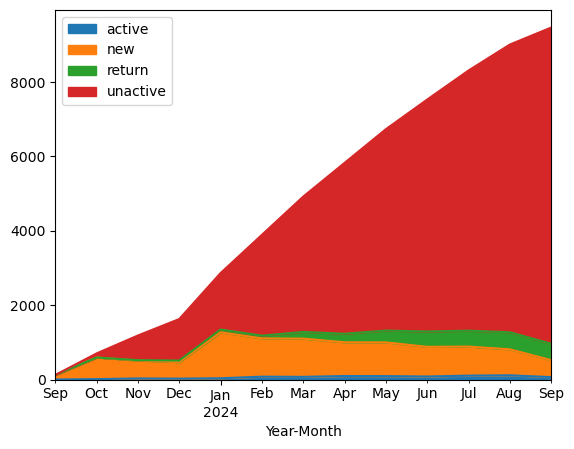

In [125]:
purchase_states_ct.T.fillna(0).plot.area()

前三个月以新用户为主，从第四个月新用户开始上升，在7 8月经过小幅的下降后趋近于平稳
回流用户主要产生在3月份之后，一直呈现逐渐攀升的趋势 是商家的重要客户
活跃用户主要产生在2月份之后，一直呈现逐渐攀升的趋势  在9月经过短暂下降后回升

In [128]:
 purchase_states_ct.T

,active,new,return,unactive
Year-Month,,,,
2023-09,NaN,121.0,NaN,NaN
2023-10,11.0,581.0,NaN,110.0
2023-11,29.0,482.0,10.0,663.0
2023-12,24.0,442.0,44.0,1116.0
2024-01,34.0,1236.0,75.0,1517.0
2024-02,77.0,1029.0,73.0,2712.0
2024-03,72.0,1028.0,181.0,3638.0
2024-04,94.0,907.0,230.0,4595.0
2024-05,92.0,906.0,319.0,5415.0


In [130]:
purchase_states_ct_T = purchase_states_ct.T
purchase_states_ct_T.columns = ['active', 'new', 'return', 'unactive']

In [132]:
purchase_states_ct_T.drop(purchase_states_ct_T.index[purchase_states_ct_T.index == 'index'], inplace=True)

In [134]:
purchase_states_ct_T

,active,new,return,unactive
Year-Month,,,,
2023-09,NaN,121.0,NaN,NaN
2023-10,11.0,581.0,NaN,110.0
2023-11,29.0,482.0,10.0,663.0
2023-12,24.0,442.0,44.0,1116.0
2024-01,34.0,1236.0,75.0,1517.0
2024-02,77.0,1029.0,73.0,2712.0
2024-03,72.0,1028.0,181.0,3638.0
2024-04,94.0,907.0,230.0,4595.0
2024-05,92.0,906.0,319.0,5415.0


In [136]:
purchase_states_ct_T.index = purchase_states_ct_T.index.to_timestamp()

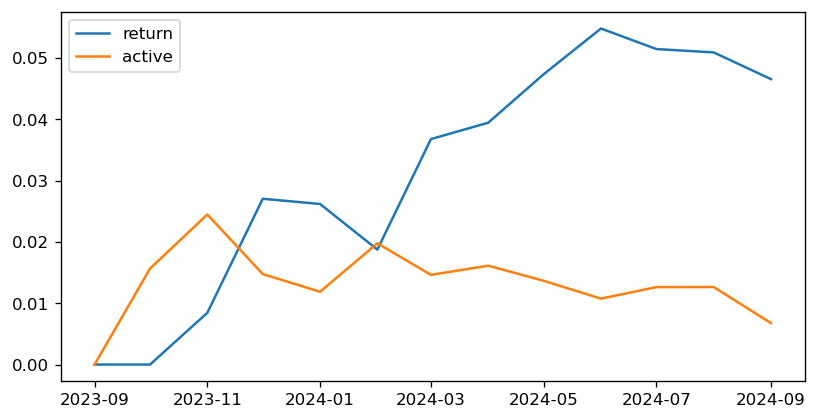

In [138]:
# 回流用户的占比
plt.figure(figsize=(8,4),dpi=120)
rate = purchase_states_ct_T.fillna(0).apply(lambda x:x/x.sum(),axis=1)
plt.plot(rate['return'],label='return')
plt.plot(rate['active'],label='active')
plt.legend()

In [ ]:
# 回流用户整年持续上涨
# 活跃用户前2个月大涨 猜测刚开始搞活动吸引很多新的用户持续消费 3月份后开始下降 并维持在1%附近

In [149]:
#用户购买周期
data1 =pd.DataFrame({
    'a':[0,1,2,3,4],
    'b':[5,4,3,2,1]
})
data1.shift()

,a,b
0,NaN,NaN
1,0.0,5.0
2,1.0,4.0
3,2.0,3.0
4,3.0,2.0


In [151]:
# shift函数：将数据移动到一定的位置（整体向下或向右,默认值axis=0向下）
# 计算购买周期
order_diff = completed_orders.groupby(by='Customer ID').apply(lambda x:abs(x['Purchase Date']-x['Purchase Date'].shift())) #当前订单日期 — 上一次订单日期
order_diff.head()

Customer ID   
1000         1        NaT
1002         2        NaT
             3   297 days
1003         4        NaT
1004         5        NaT
Name: Purchase Date, dtype: timedelta64[ns]

In [152]:
order_diff.describe()

count                          3966
mean     92 days 09:09:42.753403933
std      72 days 11:01:35.198505228
min                 0 days 00:00:00
25%                33 days 00:00:00
50%                76 days 00:00:00
75%               137 days 00:00:00
max               364 days 00:00:00
Name: Purchase Date, dtype: object

<Axes: >

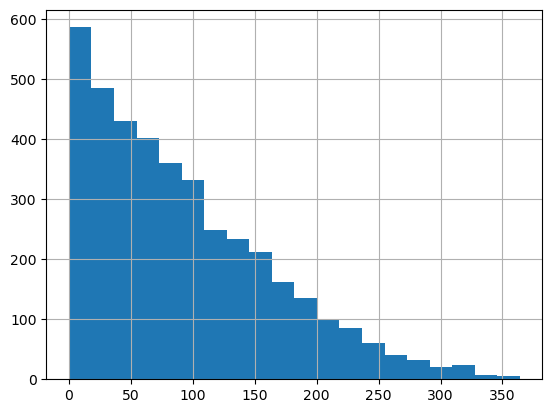

In [155]:
(order_diff/np.timedelta64(1,'D')).hist(bins=20)

In [217]:
# 平均购买周期为116天 绝大多数用户的消费周期低于150天 用户消费周期在200天以上（不积极用户）占少数
# 用户的购买周期的人数随着时间的增长而减少
# 对于不积极用户可以在用户消费后3天内通过短信回访会赠送优惠券的方式，增大消费频率

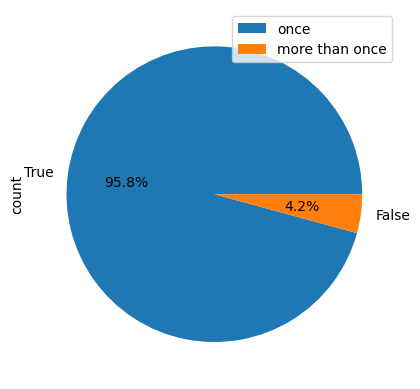

In [157]:
# 计算方式： 用户最后一次购买 — 第一次购买的日期  如果差值=0 说明用户只够买了一次
user_life = recent_orders.groupby(by='Customer ID')['Purchase Date'].agg(['min','max'])
(user_life['max'] == user_life['min']).value_counts().plot.pie(autopct='%1.1f%%') # 判断只够买一次的用户占比  格式化一位小数
plt.legend(['once','more than once'])

In [223]:
(user_life['max'] - user_life['min']).describe()
# 用户平均生命周期为29天 但是中位数为以及75%分位数0  再次验证大多数用户消费了一次  低质量用户
# 说明75%之后有很多生命周期很长的用户，属于核心用户 需要着重维持
#可能需要改

count                         1273
mean     0 days 10:54:57.407698350
std      2 days 14:53:41.607217537
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%                0 days 00:00:00
max               28 days 00:00:00
dtype: object

In [ ]:
# 有95.8% 的用户仅消费了一次，说明运营不利，留存率不高

<Axes: xlabel='Year-Month'>

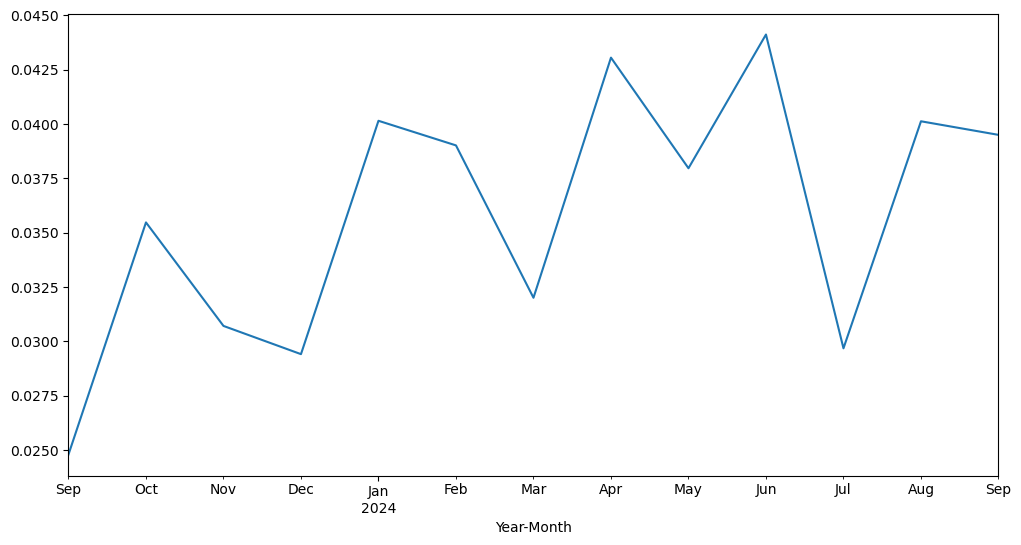

In [159]:
# 复购率
#计算方式： 在自然月内，购买多次的用户在总消费人数中的占比（同一天消费多次也算）
# 消费者有三种：1.本月消费多次（复购） 2.消费一次 3.本月无消费
# 复购： 1  非复购且有消费：0  无消费：NAN(不参与count计数)
purchase_r = pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
purchase_r.head()
# purchase_r.sum() 求出复购用户
# purchase_r.count() 求出所有参与消费的用户
(purchase_r.sum()/purchase_r.count()).plot(figsize=(12,6))  

# 前五个月复购率逐渐上升  后续趋于平稳  但是总体复购率都不高

In [173]:
# 年龄分析：
completed_orders['Age Group'] = pd.cut(completed_orders['Age'], bins=[0, 18, 45, 100], labels=['0-18', '18-45', '45+'], right=False)

# 查看结果
completed_orders

,Customer ID,Age,Gender,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,sales,Year-Month,Age Group
1,1000,53,Male,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,767.18,2024-04,45+
2,1002,41,Male,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,1855.84,2023-10,18-45
3,1002,41,Male,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,3224.92,2024-08,18-45
4,1003,75,Male,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,77.06,2024-05,45+
5,1004,41,Female,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78,148.78,2024-05,18-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,19995,69,Female,Laptop,LTP123,3,Completed,Credit Card,5394.56,674.32,8,2024-08-09,Same Day,NaN,0.00,5394.56,2024-08,45+
19994,19996,27,Female,Smartphone,SMP234,5,Completed,Credit Card,3419.04,1139.68,3,2024-04-20,Same Day,NaN,0.00,3419.04,2024-04,18-45
19995,19996,27,Female,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00,6838.08,2024-06,18-45
19997,19996,27,Female,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,2004.88,2024-08,18-45


In [177]:
monthly_age_group_counts = completed_orders.groupby(['Year-Month', 'Age Group']).size().unstack(fill_value=0)
monthly_age_group_counts

Age Group,0-18,18-45,45+
Year-Month,,,
2023-09,0,60,64
2023-10,0,257,356
2023-11,0,226,311
2023-12,0,220,305
2024-01,0,600,799
2024-02,0,540,687
2024-03,0,581,742
2024-04,0,531,753
2024-05,0,594,777


In [179]:
monthly_age_group_counts['18-45 Growth Rate'] = monthly_age_group_counts['18-45'].pct_change() * 100
monthly_age_group_counts['45+ Growth Rate'] = monthly_age_group_counts['45+'].pct_change() * 100
monthly_age_group_counts

Age Group,0-18,18-45,45+,18-45 Growth Rate,45+ Growth Rate
Year-Month,,,,,
2023-09,0,60,64,NaN,NaN
2023-10,0,257,356,328.333333,456.250000
2023-11,0,226,311,-12.062257,-12.640449
2023-12,0,220,305,-2.654867,-1.929260
2024-01,0,600,799,172.727273,161.967213
2024-02,0,540,687,-10.000000,-14.017522
2024-03,0,581,742,7.592593,8.005822
2024-04,0,531,753,-8.605852,1.482480
2024-05,0,594,777,11.864407,3.187251


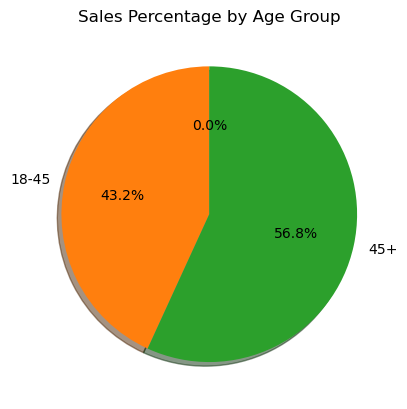

In [181]:
age_group_sales = completed_orders.groupby('Age Group')['Total Price'].sum()
total_sales = age_group_sales.sum()
age_group_sales_percentage = age_group_sales / total_sales
age_group_sales_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Sales Percentage by Age Group')
plt.ylabel('') 
plt.show()

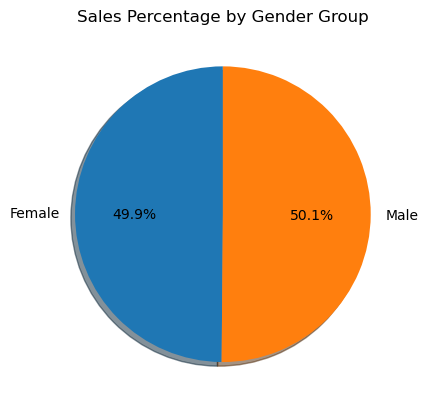

In [183]:
gender_group_sales = completed_orders.groupby('Gender')['Total Price'].sum()
gender_group_sales_percentage = gender_group_sales / total_sales
gender_group_sales_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Sales Percentage by Gender Group')
plt.ylabel('') 
plt.show()

In [185]:
monthly_gender_group_counts = completed_orders.groupby(['Year-Month', 'Gender']).size().unstack(fill_value=0)
monthly_gender_group_counts

Gender,Female,Male
Year-Month,,
2023-09,67,57
2023-10,297,316
2023-11,269,268
2023-12,255,270
2024-01,703,695
2024-02,614,613
2024-03,670,653
2024-04,613,671
2024-05,688,683


In [187]:
monthly_gender_group_counts['Female Growth Rate'] = monthly_gender_group_counts['Female'].pct_change() * 100
monthly_gender_group_counts['Male Growth Rate'] = monthly_gender_group_counts['Male'].pct_change() * 100
monthly_gender_group_counts

Gender,Female,Male,Female Growth Rate,Male Growth Rate
Year-Month,,,,
2023-09,67,57,NaN,NaN
2023-10,297,316,343.283582,454.385965
2023-11,269,268,-9.427609,-15.189873
2023-12,255,270,-5.204461,0.746269
2024-01,703,695,175.686275,157.407407
2024-02,614,613,-12.660028,-11.798561
2024-03,670,653,9.120521,6.525285
2024-04,613,671,-8.507463,2.756508
2024-05,688,683,12.234910,1.788376


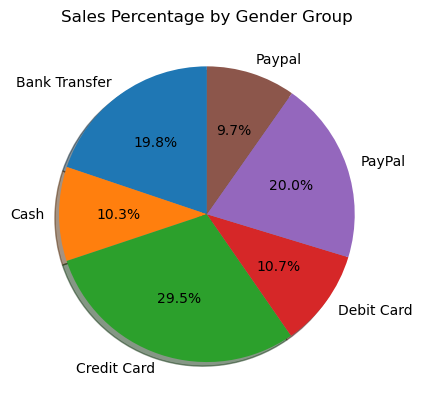

In [189]:
pm_group_sales = completed_orders.groupby('Payment Method')['Total Price'].sum()
pm_group_sales_percentage = pm_group_sales / total_sales
pm_group_sales_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Sales Percentage by Gender Group')
plt.ylabel('') 
plt.show()

In [191]:
monthly_pm_group_counts = completed_orders.groupby(['Year-Month', 'Payment Method']).size().unstack(fill_value=0)
monthly_pm_group_counts

Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Paypal
Year-Month,,,,,,
2023-09,0,33,30,35,0,26
2023-10,0,165,139,165,0,144
2023-11,0,131,122,144,0,140
2023-12,0,134,117,134,0,140
2024-01,259,156,425,167,247,145
2024-02,229,143,385,120,225,125
2024-03,271,149,382,125,255,141
2024-04,258,151,368,125,261,121
2024-05,260,153,402,151,254,151


In [237]:
monthly_pm_group_counts

Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Paypal,pct_Bank Transfer,pct_Cash,pct_Credit Card,pct_Debit Card,pct_PayPal,pct_Paypal
Year-Month,,,,,,,,,,,,
2023-09,0,33,30,35,0,26,NaN,NaN,NaN,NaN,NaN,NaN
2023-10,0,165,139,165,0,144,NaN,400.000000,363.333333,371.428571,NaN,453.846154
2023-11,0,131,122,144,0,140,NaN,-20.606061,-12.230216,-12.727273,NaN,-2.777778
2023-12,0,134,117,134,0,140,NaN,2.290076,-4.098361,-6.944444,NaN,0.000000
2024-01,259,156,425,167,247,145,inf,16.417910,263.247863,24.626866,inf,3.571429
2024-02,229,143,385,120,225,125,-11.583012,-8.333333,-9.411765,-28.143713,-8.906883,-13.793103
2024-03,271,149,382,125,255,141,18.340611,4.195804,-0.779221,4.166667,13.333333,12.800000
2024-04,258,151,368,125,261,121,-4.797048,1.342282,-3.664921,0.000000,2.352941,-14.184397
2024-05,260,153,402,151,254,151,0.775194,1.324503,9.239130,20.800000,-2.681992,24.793388


In [235]:
for column in monthly_pm_group_counts.columns:
    name = 'pct_'+column
    print(name)
    #print(monthly_pm_group_counts[column])
    monthly_pm_group_counts[name] = monthly_pm_group_counts[column].pct_change() * 100
    #print(column)

pct_Bank Transfer
pct_Cash
pct_Credit Card
pct_Debit Card
pct_PayPal
pct_Paypal


In [163]:
weekly_gmv = completed_orders.groupby(completed_orders['Purchase Date'].dt.to_period('W'))['sales'].sum().reset_index()

print(weekly_gmv)

            Purchase Date       sales
0   2023-09-18/2023-09-24    37363.11
1   2023-09-25/2023-10-01   329705.96
2   2023-10-02/2023-10-08   376216.54
3   2023-10-09/2023-10-15   330237.37
4   2023-10-16/2023-10-22   340395.84
5   2023-10-23/2023-10-29   356337.73
6   2023-10-30/2023-11-05   360216.16
7   2023-11-06/2023-11-12   262607.23
8   2023-11-13/2023-11-19   349113.68
9   2023-11-20/2023-11-26   303084.53
10  2023-11-27/2023-12-03   384535.50
11  2023-12-04/2023-12-10   302392.35
12  2023-12-11/2023-12-17   264871.91
13  2023-12-18/2023-12-24   330646.48
14  2023-12-25/2023-12-31   290070.97
15  2024-01-01/2024-01-07  1056091.29
16  2024-01-08/2024-01-14   933790.12
17  2024-01-15/2024-01-21  1152915.70
18  2024-01-22/2024-01-28  1039457.91
19  2024-01-29/2024-02-04   960680.70
20  2024-02-05/2024-02-11   958852.97
21  2024-02-12/2024-02-18   882571.30
22  2024-02-19/2024-02-25  1020646.01
23  2024-02-26/2024-03-03   965741.28
24  2024-03-04/2024-03-10   987293.11
25  2024-03-

In [165]:
weekly_quantity = completed_orders.groupby(completed_orders['Purchase Date'].dt.to_period('W'))['Quantity'].sum().reset_index()
print(weekly_quantity)

            Purchase Date  Quantity
0   2023-09-18/2023-09-24       105
1   2023-09-25/2023-10-01       698
2   2023-10-02/2023-10-08       775
3   2023-10-09/2023-10-15       753
4   2023-10-16/2023-10-22       732
5   2023-10-23/2023-10-29       760
6   2023-10-30/2023-11-05       771
7   2023-11-06/2023-11-12       604
8   2023-11-13/2023-11-19       688
9   2023-11-20/2023-11-26       576
10  2023-11-27/2023-12-03       774
11  2023-12-04/2023-12-10       643
12  2023-12-11/2023-12-17       612
13  2023-12-18/2023-12-24       698
14  2023-12-25/2023-12-31       636
15  2024-01-01/2024-01-07      1735
16  2024-01-08/2024-01-14      1657
17  2024-01-15/2024-01-21      1847
18  2024-01-22/2024-01-28      1699
19  2024-01-29/2024-02-04      1613
20  2024-02-05/2024-02-11      1632
21  2024-02-12/2024-02-18      1474
22  2024-02-19/2024-02-25      1651
23  2024-02-26/2024-03-03      1594
24  2024-03-04/2024-03-10      1611
25  2024-03-11/2024-03-17      1611
26  2024-03-18/2024-03-24   

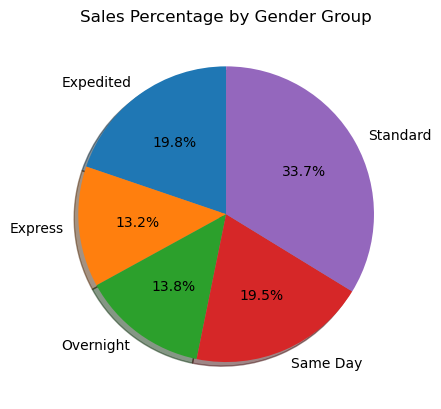

In [239]:
shipping_group_sales = completed_orders.groupby('Shipping Type')['Total Price'].sum()
shipping_group_sales_percentage = shipping_group_sales / total_sales
shipping_group_sales_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Sales Percentage by Gender Group')
plt.ylabel('')
plt.show()

In [241]:
monthly_shipping_group_counts = completed_orders.groupby(['Year-Month', 'Shipping Type']).size().unstack(fill_value=0)
monthly_shipping_group_counts

Shipping Type,Expedited,Express,Overnight,Same Day,Standard
Year-Month,,,,,
2023-09,0,45,37,0,42
2023-10,0,197,207,0,209
2023-11,0,152,208,0,177
2023-12,0,176,171,0,178
2024-01,257,213,197,253,479
2024-02,244,180,174,231,398
2024-03,235,179,191,253,465
2024-04,255,168,162,251,448
2024-05,248,190,204,271,458


In [243]:
for column in monthly_shipping_group_counts.columns:
    name = 'pct_'+column
    #print(name)
    monthly_shipping_group_counts[name] = monthly_shipping_group_counts[column].pct_change() * 100
    #print(column)
monthly_shipping_group_counts

pct_Expedited
pct_Express
pct_Overnight
pct_Same Day
pct_Standard


Shipping Type,Expedited,Express,Overnight,Same Day,Standard,pct_Expedited,pct_Express,pct_Overnight,pct_Same Day,pct_Standard
Year-Month,,,,,,,,,,
2023-09,0,45,37,0,42,NaN,NaN,NaN,NaN,NaN
2023-10,0,197,207,0,209,NaN,337.777778,459.459459,NaN,397.619048
2023-11,0,152,208,0,177,NaN,-22.842640,0.483092,NaN,-15.311005
2023-12,0,176,171,0,178,NaN,15.789474,-17.788462,NaN,0.564972
2024-01,257,213,197,253,479,inf,21.022727,15.204678,inf,169.101124
2024-02,244,180,174,231,398,-5.058366,-15.492958,-11.675127,-8.695652,-16.910230
2024-03,235,179,191,253,465,-3.688525,-0.555556,9.770115,9.523810,16.834171
2024-04,255,168,162,251,448,8.510638,-6.145251,-15.183246,-0.790514,-3.655914
2024-05,248,190,204,271,458,-2.745098,13.095238,25.925926,7.968127,2.232143
